In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [2]:
df_train = pd.read_csv('data/train_set.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_train.head()

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_adress_lat,pos_adress_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
0,2.884034,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15,59.847,30.177
1,2.775633,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,e9647a5e1eacfb06713b6af755ccc595,2017-10-27,59.847,30.177
2,3.708368,NaN,NaN,NaN,St Petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5992,"PR.MARSHALA ZHUKOVA,31St Petersburg190000 7...",59.858198,30.229024,df06c1fcd3718a514535ae822785f716,2017-10-03,59.847,30.177
3,2.787498,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,6c5e5793ebc984fb72875feffff62854,2017-09-09,59.847,30.177
4,2.892510,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-06,59.847,30.177


In [4]:
df_train.shape

(1224734, 18)

In [5]:
# число уникальных клиентов
df_train.customer_id.nunique()

10000

In [6]:
# посчитаем транзакции, для которых у нас известны координаты
df_train['atm_addres_lon_lat_exists'] = 1 - df_train['atm_address_lon'].isnull()

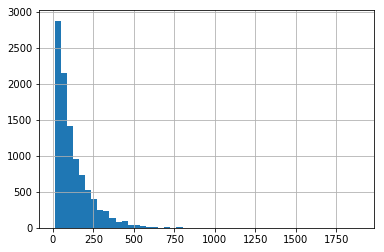

In [7]:
# сколько траназакций клиентов у нас есть
df_train.groupby('customer_id')['customer_id'].count().hist(bins  = 50)

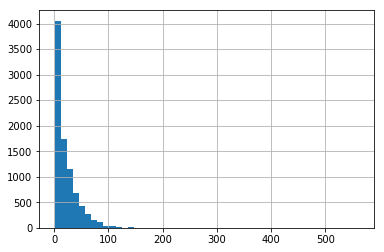

In [8]:
# сколько размеченных транзакций клиентов у нас есть
df_train[df_train.atm_addres_lon_lat_exists == 1].groupby('customer_id')['customer_id'].count().hist(bins  = 50)

In [9]:
df_train[df_train['terminal_id'] == '0004b2a8bef47fa9af780c7679aba5d1']

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_adress_lat,pos_adress_lon,terminal_id,transaction_date,work_add_lat,work_add_lon,atm_addres_lon_lat_exists
942660,3.290224,"Москва, ул. Таганская, д. 17-23",55.744,37.663,MOSKVA,RUS,643.0,97b421fd894007e250dab809624c995b,55.659,37.502,6011,NaN,NaN,NaN,0004b2a8bef47fa9af780c7679aba5d1,2017-08-15,NaN,NaN,1
942661,4.256019,"Москва, ул. Таганская, д. 17-23",55.741,37.665,MOSKVA,RUS,643.0,9121bf57cc093107f5d04e349b0a8097,55.824,37.804,6011,NaN,NaN,NaN,0004b2a8bef47fa9af780c7679aba5d1,2017-06-27,55.741,37.664,1
942662,4.402484,"Москва, ул. Таганская, д. 17-23",55.741,37.667,MOSKVA,RUS,643.0,9121bf57cc093107f5d04e349b0a8097,55.824,37.804,6011,NaN,NaN,NaN,0004b2a8bef47fa9af780c7679aba5d1,2017-11-02,55.741,37.664,1
942663,3.601407,"Москва, ул. Таганская, д. 17-23",55.743,37.662,MOSKVA,RUS,643.0,9121bf57cc093107f5d04e349b0a8097,55.824,37.804,6011,NaN,NaN,NaN,0004b2a8bef47fa9af780c7679aba5d1,2017-02-10,55.741,37.664,1
942664,4.154766,"Москва, ул. Таганская, д. 17-23",55.742,37.668,MOSKVA,RUS,643.0,97b421fd894007e250dab809624c995b,55.659,37.502,6011,NaN,NaN,NaN,0004b2a8bef47fa9af780c7679aba5d1,2017-03-24,NaN,NaN,1
942665,3.706789,"Москва, ул. Таганская, д. 17-23",55.737,37.667,MOSKVA,RUS,643.0,9121bf57cc093107f5d04e349b0a8097,55.824,37.804,6011,NaN,NaN,NaN,0004b2a8bef47fa9af780c7679aba5d1,2017-07-03,55.741,37.664,1
942666,3.292168,"Москва, ул. Таганская, д. 17-23",55.744,37.666,MOSKVA,RUS,643.0,9121bf57cc093107f5d04e349b0a8097,55.824,37.804,6011,NaN,NaN,NaN,0004b2a8bef47fa9af780c7679aba5d1,2017-06-29,55.741,37.664,1
942667,3.993990,"Москва, ул. Таганская, д. 17-23",55.737,37.663,MOSKVA,RUS,643.0,97b421fd894007e250dab809624c995b,55.659,37.502,6011,NaN,NaN,NaN,0004b2a8bef47fa9af780c7679aba5d1,2017-08-30,NaN,NaN,1
942668,3.306480,"Москва, ул. Таганская, д. 17-23",55.740,37.664,MOSKVA,RUS,643.0,97b421fd894007e250dab809624c995b,55.659,37.502,6011,NaN,NaN,NaN,0004b2a8bef47fa9af780c7679aba5d1,2017-06-20,NaN,NaN,1
942669,3.942296,"Москва, ул. Таганская, д. 17-23",55.741,37.664,MOSKVA,RUS,643.0,97b421fd894007e250dab809624c995b,55.659,37.502,6011,NaN,NaN,NaN,0004b2a8bef47fa9af780c7679aba5d1,2017-04-10,NaN,NaN,1


In [10]:
#самые популярные терминалы
tmp = df_train.groupby('terminal_id')['customer_id'].apply(set).reset_index()
tmp['count_distinct'] = tmp['customer_id'].apply(lambda x: len(x))
most_popular_terminals = tmp[tmp.count_distinct > 1][['terminal_id','count_distinct']]

In [11]:
df_test = pd.read_csv('data/test_set.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df_test.head()

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date
0,2.211818,NaN,NaN,NaN,IVANTEEVKA,RUS,643.0,00fd410f5c580c8351cafa88d82b60f3,"5,411",2-1 TOLMACHEVA STRIVANTEEVKA141280 RUSRUS,55.967487,37.913682,ff0476dae4b098a7b16aabe93d4268df,2017-08-24
1,1.331379,NaN,NaN,NaN,IVANTEEVKA,RUS,643.0,00fd410f5c580c8351cafa88d82b60f3,"4,111","SOVETSKIJ, 32IVANTEEVKA141282 RUSRUS",55.971296,37.905184,7cfd9a60282459d4692ecc85b856072e,2017-08-12
2,2.608004,NaN,NaN,NaN,PUSHKINO,RUS,643.0,00fd410f5c580c8351cafa88d82b60f3,"5,411","105,KRASOARMEYSKOE SHPUSHKINO141206 RUSRUS",56.016591,37.909098,7e5a532f0029861d8a9c4f0479b9450b,2017-06-17
3,1.916752,NaN,NaN,NaN,IVANTEEVKA,RUS,643.0,00fd410f5c580c8351cafa88d82b60f3,"5,411","G. IVANTEEVKA, UL.TOLMACHEVA, D.6IVANTEEVKA141...",55.964507,37.937912,2afe7d1bc61b86c449f413bdf2119032,2017-08-12
4,1.981067,NaN,NaN,NaN,MOSCOW,RUS,643.0,00fd410f5c580c8351cafa88d82b60f3,"5,814",5 KOMSOMOLSKAYA SQMOSCOW101000 RUSRUS,55.776802,37.657352,ab4f00601ff1d949afc59ee3f804c79c,2017-04-26


In [13]:
df_test.customer_id.nunique()

9997

In [14]:
# проверка пересечения клиентов
test_set = set(df_test.customer_id)
train_set = set(df_train.customer_id)
len(train_set.intersection(test_set))

0

In [15]:
# составим известные адреса терминалов
df_terminals = df_train[['pos_address','pos_adress_lat','pos_adress_lon','terminal_id','mcc','city']]

In [16]:
df_terminals = df_terminals.drop_duplicates()

In [17]:
# всего уникальных терминалов (хотя город и адрес наверняка наводят смуту)
df_terminals.shape

(210978, 6)

In [18]:
df_terminals = df_terminals[(df_terminals.mcc != 6011) & (df_terminals.mcc !=6010)]
list_bad_mcc = df_terminals[df_terminals['pos_adress_lat'].isnull() == True]['mcc']
df_terminals = df_terminals[~df_terminals.mcc.isin(list_bad_mcc)]

In [19]:
df_terminals.head()

,pos_address,pos_adress_lat,pos_adress_lon,terminal_id,mcc,city
0,NaN,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,5261,ST PETERSBURG
1,NaN,59.844072,30.179153,e9647a5e1eacfb06713b6af755ccc595,5261,ST PETERSBURG
2,"PR.MARSHALA ZHUKOVA,31St Petersburg190000 7...",59.858198,30.229024,df06c1fcd3718a514535ae822785f716,5992,St Petersburg
3,NaN,59.844072,30.179153,6c5e5793ebc984fb72875feffff62854,5261,ST PETERSBURG
4,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,5261,ST PETERSBURG


In [20]:
df_terminals.terminal_id.nunique()

186104

In [21]:
tmp = df_terminals.groupby('terminal_id')['city'].count().reset_index()
tmp[tmp.city > 1].head(10)

,terminal_id,city
60,00177502afb8ebb9398c4394161db4b0,2
159,00378afc386b06d8618c7e79d508a182,2
282,0064649fa669d8ad33dbf18f9a1ee38f,2
313,006f98bb72c490aa2c35430ece8e991d,2
323,00731c78bb699c69a570a3450ae2f066,2
358,007f03da0769013bd23f1b0ec7f04395,2
522,00b99cfe7637ef94176ad1780b417e90,2
537,00bca7609c0a7760b54c8531b5f9af92,2
607,00d547b9c4dc81e98ee3fb1b607faabf,2
824,012285b42b8cec313f74e10944b5cb11,2


In [22]:
df_terminals[df_terminals.terminal_id == '00177502afb8ebb9398c4394161db4b0']

,pos_address,pos_adress_lat,pos_adress_lon,terminal_id,mcc,city
607209,LENINGRADSKOE HW 16MOSCOW125171 RUSRUS,55.899056,37.421839,00177502afb8ebb9398c4394161db4b0,5311,MOSCOW
843004,LENINGRADSKOE HW 16MOSCOW125171 RUSRUS,55.899056,37.421839,00177502afb8ebb9398c4394161db4b0,5641,MOSCOW


In [41]:
terminals_map = folium.Map(location=[65, -18.6], zoom_start=6, tiles="Stamen toner")

for index, row in df_terminals[['pos_adress_lat','pos_adress_lon','terminal_id','mcc']].iterrows():
    marker = folium.features.CircleMarker(location=[row["pos_adress_lat"], row["pos_adress_lon"]])
    terminals_map.add_child(marker)
# Create and show the map.

In [42]:
folium.Map.save(terminals_map, "index1.html")